In [1]:
import time
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
start = time.time()

In [3]:
def print_time_execution(start, end, txt):

  delta = int(end - start)

  hours = int(delta/3_600)
  mins = int((delta - 3_600*hours)/60)
  segs = int(delta - hours*3600 - mins*60)

  print(f'{txt} it takes {hours} hours, {mins} mins and {segs} segs.')

# 1. Creation of datasets

In [4]:
df = pd.DataFrame({'X': [i for i in range(1, 20 + 1)], 'y': [(i**2) for i in range(1, 20 + 1)]})

In [5]:
df['X'] = df['X'].astype('float32')
df['y'] = df['y'].astype('float32')

In [6]:
X = df[['X']].copy()
y = df['y'].copy()

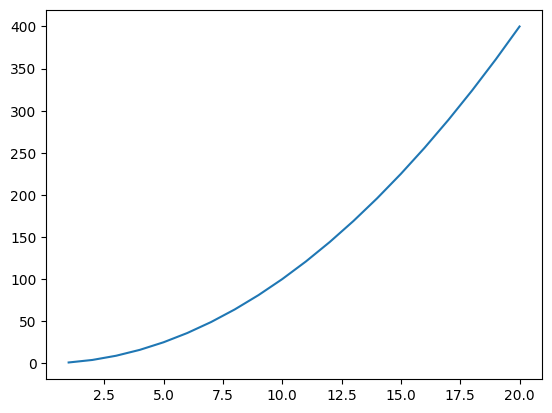

In [7]:
plt.plot(X, y)
plt.show()

### 2. Split datasets

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.6, random_state = 42)

In [9]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.6, random_state = 42)

In [10]:
X_train = torch.tensor(np.array(X_train))
y_train = torch.tensor(np.array(y_train))

X_val = torch.tensor(np.array(X_val))
y_val = torch.tensor(np.array(y_val))

X_test = torch.tensor(np.array(X_test))
y_test = torch.tensor(np.array(y_test))

### 3. Creation of model

In [11]:
class NN(nn.Module):

    def __init__(self, input_size, hidden_dim_1, hidden_dim_2, output_size):
        super(NN, self).__init__()

        #----------------------------------------------------------------------

        self.input_size = input_size

        self.hidden_dim_1 = hidden_dim_1
        self.hidden_dim_2 = hidden_dim_2

        self.output_size = output_size

        #----------------------------------------------------------------------

        self.fc_entry = nn.Linear(self.input_size, self.hidden_dim_1)

        self.fc_1 = nn.Linear(self.hidden_dim_1, self.hidden_dim_2)
        self.fc_2 = nn.Linear(self.hidden_dim_2, self.output_size)

        self.activation_1 = nn.ReLU()
        self.activation_2 = nn.ReLU()

        #----------------------------------------------------------------------


    def forward(self, x):

        out = self.fc_entry(x)
        out = self.activation_1(out)

        out = self.fc_1(out)
        out = self.activation_2(out)

        out = self.fc_2(out)

        return out

### 4. Training

In [12]:
input_size = 1
hidden_dim_1 = 10
hidden_dim_2 = 20
output_size = 1

n_epochs = 1_000
lr = 0.1

In [13]:
model = NN(input_size, hidden_dim_1, hidden_dim_2, output_size)

In [14]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [15]:
start_train = time.time()

In [16]:
all_loss = []
all_loss_val = []
all_epochs = []


for epoch in range(1, n_epochs + 1):

      #--------------------------------------------------------------------

      start_epoch = time.time()

      #--------------------------------------------------------------------

      # 1. Train epoch

      model.train()

      loss_train_epoch = 0

      optimizer.zero_grad() # Clears existing gradients

      out_train = model(X_train)
      out_train = torch.reshape(out_train, (-1, ))
      loss_train = criterion(out_train, y_train)

      loss_train.backward()
      optimizer.step() # Updates the weights accordingly

      loss_train_epoch = loss_train.item()/len(X_train)
      all_loss.append(loss_train_epoch)
      all_epochs.append(epoch)

      #--------------------------------------------------------------------

      # 2. Evaluation

      model.eval()

      out_val = model(X_val)
      out_val = torch.reshape(out_val, (-1, ))

      loss_val = criterion(out_val, y_val).item()/len(X_val)

      all_loss_val.append(loss_val)

      #--------------------------------------------------------------------

      end_epoch = time.time()
      print_time_execution(start_epoch, end_epoch, f'Execution epoch = {epoch}')
      print('-'*70)

      #--------------------------------------------------------------------

all_epochs = np.array(all_epochs)
all_loss_val = np.array(all_loss_val)
all_loss = np.array(all_loss)

Execution epoch = 1 it takes 0 hours, 0 mins and 0 segs.
----------------------------------------------------------------------
Execution epoch = 2 it takes 0 hours, 0 mins and 0 segs.
----------------------------------------------------------------------
Execution epoch = 3 it takes 0 hours, 0 mins and 0 segs.
----------------------------------------------------------------------
Execution epoch = 4 it takes 0 hours, 0 mins and 0 segs.
----------------------------------------------------------------------
Execution epoch = 5 it takes 0 hours, 0 mins and 0 segs.
----------------------------------------------------------------------
Execution epoch = 6 it takes 0 hours, 0 mins and 0 segs.
----------------------------------------------------------------------
Execution epoch = 7 it takes 0 hours, 0 mins and 0 segs.
----------------------------------------------------------------------
Execution epoch = 8 it takes 0 hours, 0 mins and 0 segs.
-----------------------------------------------

In [17]:
end_train = time.time()
print_time_execution(start_train, end_train, f'Execution of training')
print('-'*70)

Execution of training it takes 0 hours, 0 mins and 5 segs.
----------------------------------------------------------------------


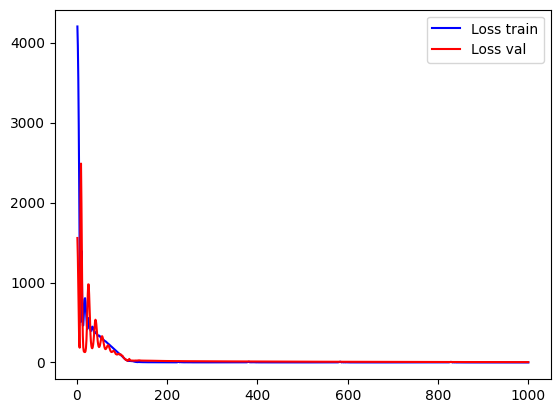

In [18]:
plt.plot(all_epochs, all_loss, color = 'blue', label = 'Loss train')
plt.plot(all_epochs, all_loss_val, color = 'red', label = 'Loss val')
plt.legend()
plt.show()

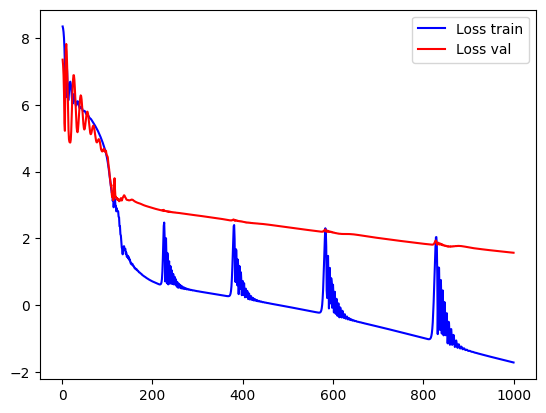

In [19]:
plt.plot(all_epochs, np.log(all_loss), color = 'blue', label = 'Loss train')
plt.plot(all_epochs, np.log(all_loss_val), color = 'red', label = 'Loss val')
plt.legend()
plt.show()

### 5. Prediction

In [20]:
out_train = model(X_train)
out_train = torch.reshape(out_train, (-1, ))
out_train = out_train.detach().numpy()

In [21]:
out_val = model(X_val)
out_val = torch.reshape(out_val, (-1, ))
out_val = out_val.detach().numpy()

In [22]:
out_test = model(X_test)
out_test = torch.reshape(out_test, (-1, ))
out_test = out_test.detach().numpy()

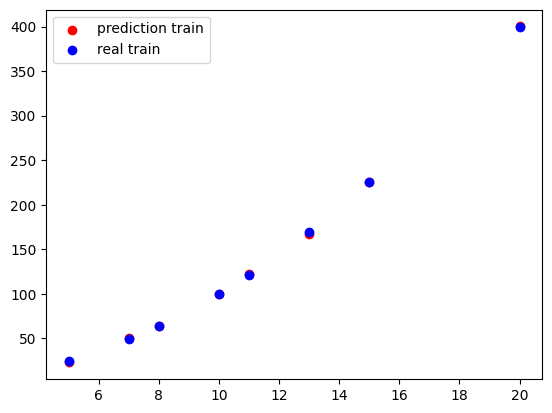

In [23]:
plt.scatter(X_train, out_train, color = 'red', label = 'prediction train')
plt.scatter(X_train, y_train, color = 'blue', label = 'real train')

plt.legend()
plt.show()

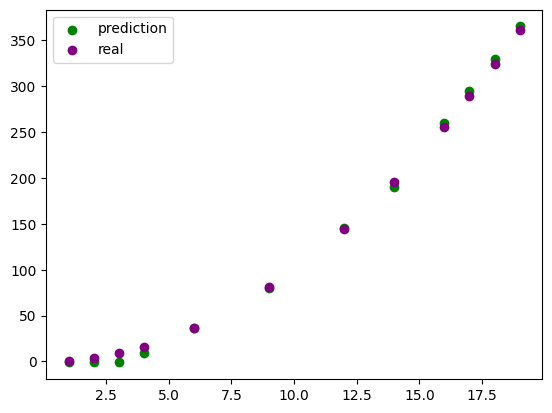

In [24]:
plt.scatter(X_val, out_val, color = 'green', label = 'prediction')
plt.scatter(X_val, y_val, color = 'purple', label = 'real')

plt.scatter(X_test, out_test, color = 'green')
plt.scatter(X_test, y_test, color = 'purple')

plt.legend()
plt.show()

### Time of execution

In [25]:
end = time.time()
print_time_execution(start, end, 'Execution model')

Execution model it takes 0 hours, 0 mins and 8 segs.
